In [1]:
import xarray as xr

# select location of interest
lat = 52
lon = 5

ds_era5land = xr.open_mfdataset("C:/STEMMUS_SCOPE_data/global/era5/2016-jan/era5-land*.nc").sel(latitude=lat, longitude=lon).compute()
ds_era5 = xr.open_mfdataset("C:/STEMMUS_SCOPE_data/global/era5/2016-jan/era5_*.nc").sel(latitude=lat, longitude=lon).compute()

ds_era5land = ds_era5land.resample(time="1800S").interpolate('linear')
ds_era5land = ds_era5land.drop(['latitude', 'longitude'])

ds_era5 = ds_era5.resample(time="1800S").interpolate('linear')
ds_era5 = ds_era5.drop(['latitude', 'longitude'])

ds = xr.merge([ds_era5land, ds_era5])


Calculate required variables

In [2]:
from PyStemmusScope import variable_conversion as vc

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 1487)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-01-31T23:00:00
Data variables:
    d2m      (time) float64 276.3 276.8 277.3 277.5 ... 282.3 282.4 282.5 282.6
    t2m      (time) float64 279.8 280.1 280.4 280.4 ... 283.3 283.4 283.5 283.6
    mtpr     (time) float64 2.705e-05 3.618e-05 4.53e-05 ... 0.0001986 0.0002346
    sp       (time) float64 1.021e+05 1.021e+05 ... 1.008e+05 1.008e+05
    ssrd     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    strd     (time) float64 1.025e+06 1.104e+06 ... 1.295e+06 1.293e+06
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-05 14:26:51 UTC by era5cli 1.3.1: reanalysis-era5-l...

In [84]:
ds_ss = xr.Dataset()
ds_ss["wind_speed"] = (ds["u10"] ** 2 + ds["v10"] ** 2) ** 0.5
ds_ss["t_air_celcius"] = ds["t2m"] + 273.15
ds_ss["precip"] = ds["mtpr"] / 10  # mm/s -> cm/s
ds_ss["p_surf"] = ds["sp"] / 1000
ds_ss["sw_down"] = ds["ssrd"] / 3600
ds_ss["lw_down"] = ds["strd"] / 3600

ds_ss["ea"] = vc.calculate_es(ds["2m_dewpoint_temperature"] - 273.15)
ds_ss["vpd"] = vc.calculate_es(ds_ss["t_air_celcius"]) - ds_ss["ea"]
ds_ss["rh"] = ds_ss["ea"] / vc.calculate_es(ds_ss["t_air_celcius"])  
#ds_ss["qair"] = 

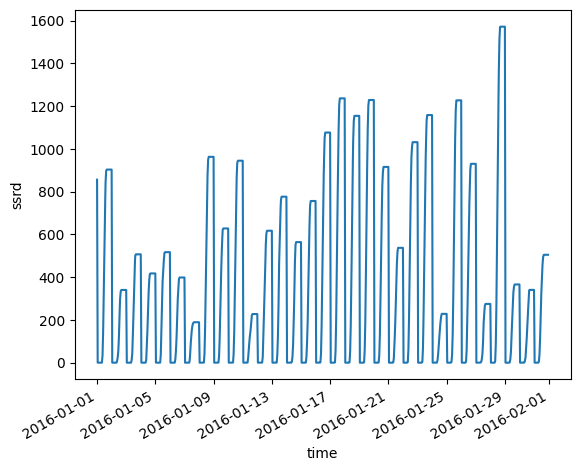

In [7]:
(ds["ssrd"] / 3600).plot()


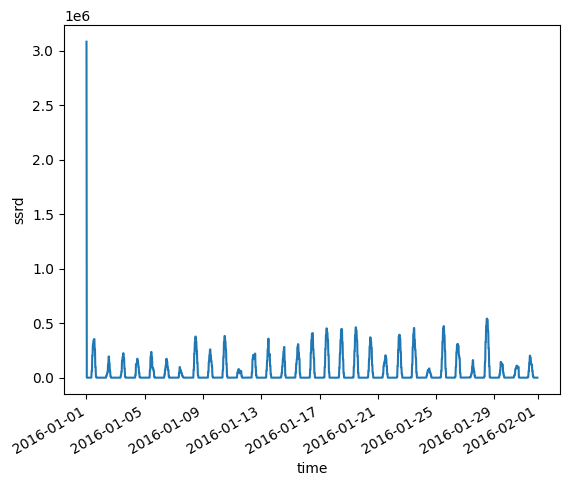

In [16]:
#ds["ssrd"].sel(time=slice("2016-01-13", "2016-01-14")).plot()
import numpy as np
srd = ds["ssrd"] - np.concatenate(([0], ds["ssrd"].isel(time=slice(None, -1)).values))
srd.where(srd>=0, 0).plot()

3082487.25 1541243.625


In [72]:
# resample to 30 minute intervals, using linear interpolation
ds = ds.resample(time="1800S").interpolate('linear')
ds = ds.drop(['latitude', 'longitude'])


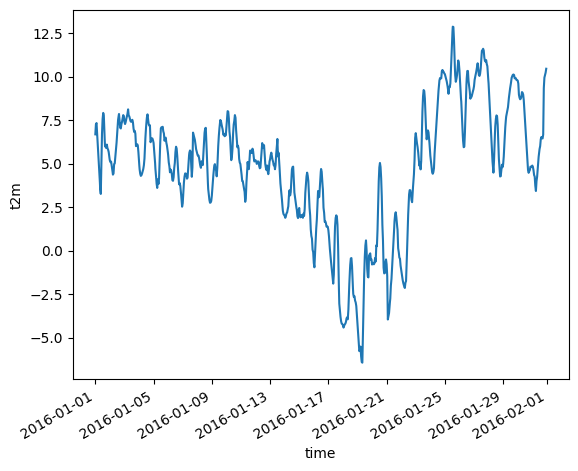

In [75]:
(ds.t2m - 273.15).plot()

In [76]:
precip_mm_s = ds.mtpr

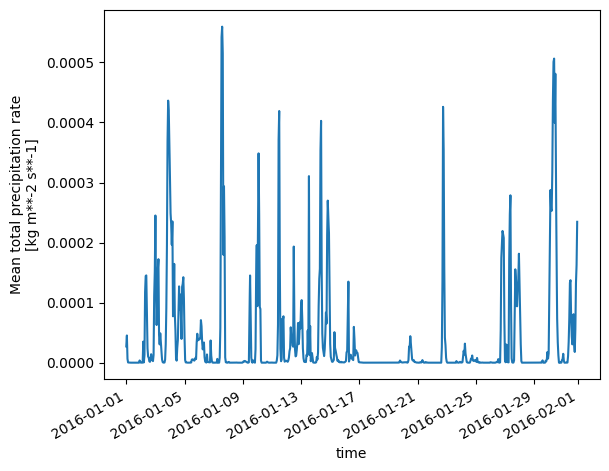

In [78]:
precip_mm_s.plot()